# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# returns the number of rows and columns present in the data
df.shape

(1898, 9)

#### Observations: 
- The data has 1,898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# print a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 

1. Order_id, customer_id, food_prep_time and delivery_time are integer type attributes
2. cost_of_the_order is the only float type attribute present in the data
3. restaurant_name, cuisine_type, day_of_the_week and rating are all object type attributes.


### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# make a list of the columns to convert
cols = ["restaurant_name", "cuisine_type", "day_of_the_week"]
# convert the listed columns to category type
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
Yes, Converting 'restaurant_name', 'cuisine_type' and'day_of_the_week'object type attributes to category type results in reduced memory usage. This is evidenced when you compare the memory usage result of **df.info()** command before and after the conversion.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# returns the statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

1. Minimum time for food preparation = 20 minutes
2. Average time for food preparation = 27.37 minutes
3. Maximum time for food preparation = 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# returns a data frame with only orders whose ratings were not given
df1 = df[df["rating"]=="Not given"]
# checks for the dimensions of returned data frame
df1.shape

(736, 9)

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})

In [10]:

def hist_boxplot(data, x_var):
    """
    Function to create a histogram and box_plot for 
    the numerical columns that is , food_preparation_time, delivery_time, and
    cost_of_the_order
    """
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    # assigning a graph to each ax
    sns.boxplot(data=df, x=x_var, ax=ax_box)
    sns.histplot(data=df, x=x_var, ax=ax_hist, kde=True)
    ax_hist.axvline(
    data[x_var].mean(), color="r", linestyle="solid") #add mean to histogram
    ax_hist.axvline(
    data[x_var].median(), color="y", linestyle="dashed") #add median to histogram
    ax_hist.axvline(
    data[x_var].mean(), color="g", linestyle="dotted") #add mode to histogram

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

### Food preparation time

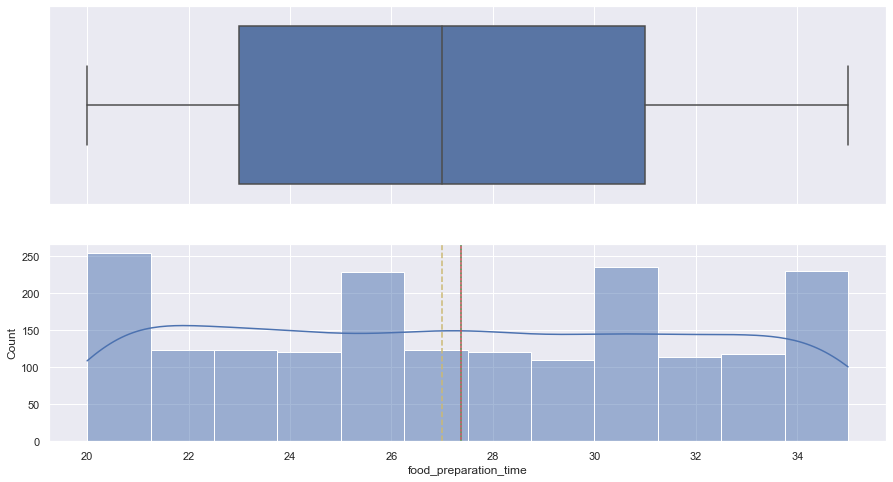

In [11]:
# distribution of food preparation time variable
hist_boxplot(df, 'food_preparation_time')

### Observations:

- Average time for food preparation time is approximately 27 minutes
- Most food orders are prepared within 20 - 21 minutes
- There are no outliers in the food preparation time data

### Delivery Time

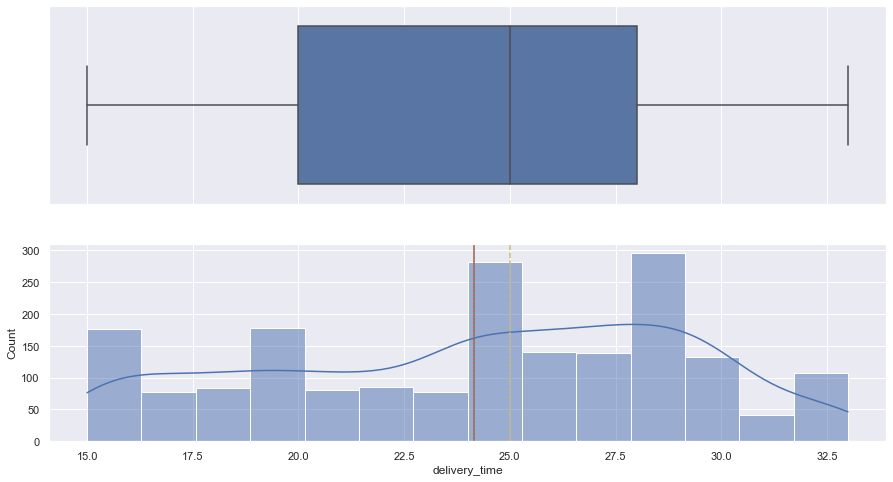

In [12]:
# distribution of delivery time variable
hist_boxplot(df, 'delivery_time')

### Observations:

- There are no outliers in the delivery time data
- Delivery time distribution is left skewed

### Cost of the Order

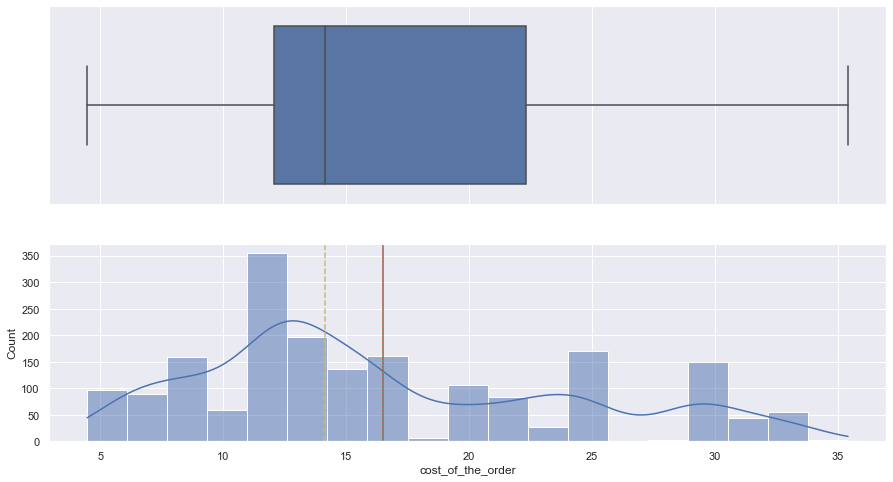

In [13]:
# distribution of the cost of order variable
hist_boxplot(df, 'cost_of_the_order')

 ### Observations:
 
 - The distribution of cost of orders is right skewed
 - The majority of orders cost between 10-15 dollars
 - Cost of order does not have any outliers

In [14]:
def count_plot(data, x_var):
    """
        Function to create countplots for categorical columns
    """
    plt.xticks(rotation=90, fontsize=15) # rotate X-axis tick label text to avoid overlapping
    ax = sns.countplot(
        data=data,
        x=x_var,
        palette="Paired"
    )


### Day of the week

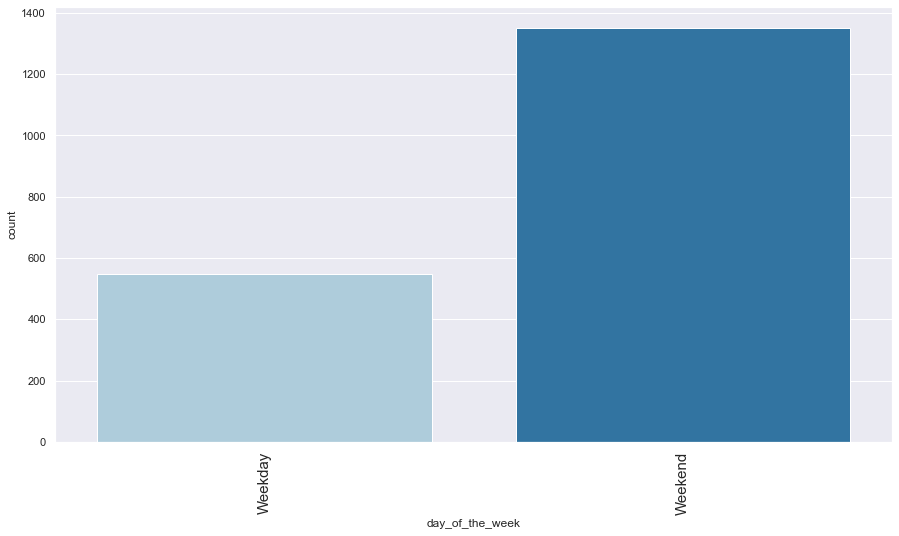

In [15]:
# distribution of the day of the week variable
count_plot(df, "day_of_the_week")

### Observations
- There are more food orders on weekends than weekdays

### Cuisine Type:

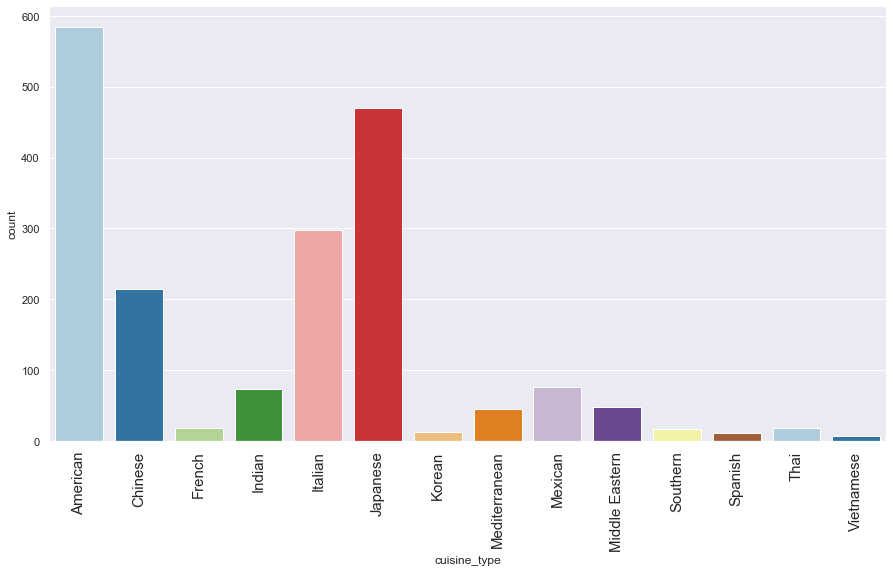

In [16]:
# distribution of the cuisine type variable
count_plot(df, "cuisine_type")

### Observations:

- The most ordered cuisine type is **American**
- This implies that restaurants that sell American food receive more orders

### Rating

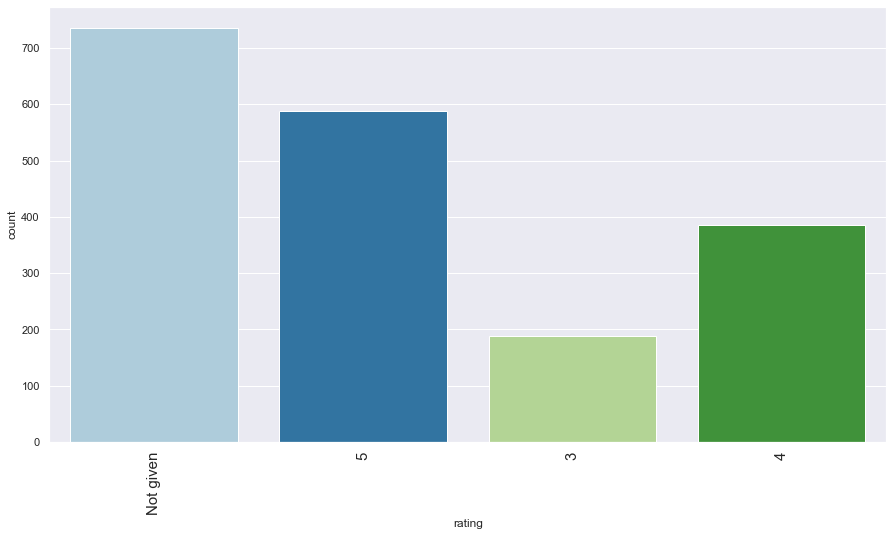

In [17]:
# distribution of the rating variable
count_plot(df, "rating")

### Observations:

- From the graph above, we can see that most orders were not rated
- This affects the company by not gathering enough information on the customer satisfaction about the orders' details.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# returns counts of unique top 5 restaurants
df["restaurant_name"].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
 The top five restaurants in terms of number of orders received in descending order are;
 1. Shake Shack
 2. The Meatball Shop
 3. Blue Ribbon Sushi
 4. Blue Ribbon Fried Chicken
 5. Parm 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# returns a data frame with only weekend orders
df2 = df[df["day_of_the_week"]=="Weekend"]
df2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [20]:
df2["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
 The most popular cuisine on weekends is **American**

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# returns a dataframe with only orders that cost more than 20 dollars
df3 = df[df["cost_of_the_order"]>20]
# calculates the percentage
percentage = len(df3)/len(df)*100
print(percentage)

29.24130663856691


#### Observations:
 The percentage of orders that cost more than 20 dollars is approximately  **29.24 %**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# returns the mean of the delivery time variable
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# returns the count of the top 5 most frequent customers
df["customer_id"].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
##### The top five most frequent customers in descending order are:
1. customer with id **52832** placed **13 orders**
2. customer with id **47440** placed **10 orders**
3. customer with id **83287** placed **9 orders**
4. customer with id **250494** placed **8 orders**
5. customer with id **259341** placed **7 orders**


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


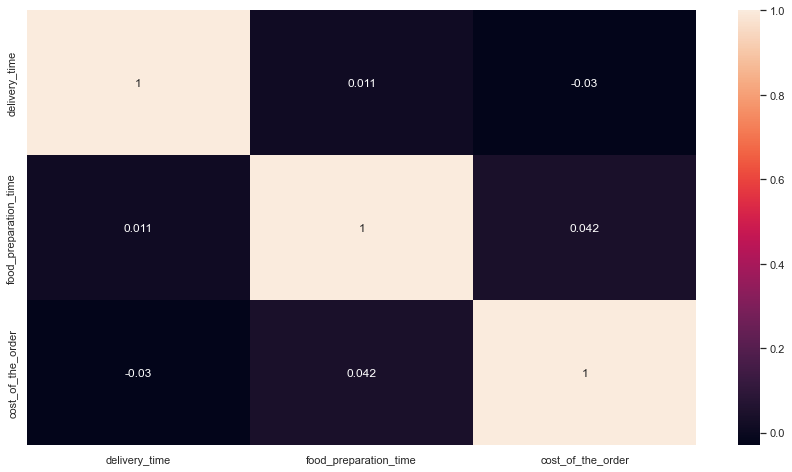

In [24]:
# check correlation among numerical columns
num_cols = ["delivery_time", "food_preparation_time", "cost_of_the_order"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True);

- There does not seem to be a strong relationship between the numerical columns of our data

### Cuisine type vs Cost of order

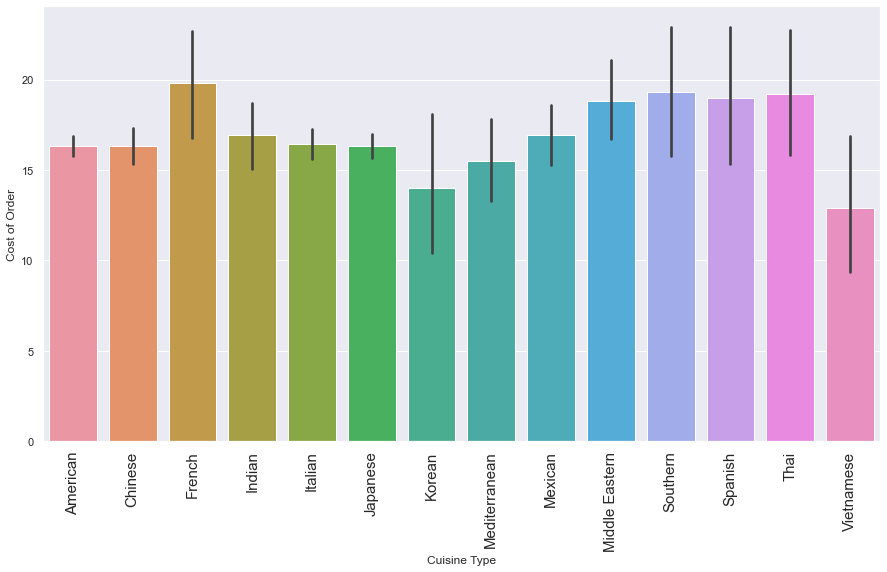

In [25]:
# Relationship between cuisine_type and cost_of_order
plt.xticks(rotation=90, fontsize=15)  #rotate X-axis tick label
sns.barplot(data=df, x="cuisine_type", y="cost_of_the_order") # plot bar plot
plt.ylabel("Cost of Order")
plt.xlabel("Cuisine Type");

### Observations:

- The French cuisine type is at a higher cost compared to others
- This could probably be one of the reasons it is ordered less as shown in its distribution plot above

### Cuisine type vs Day of the week

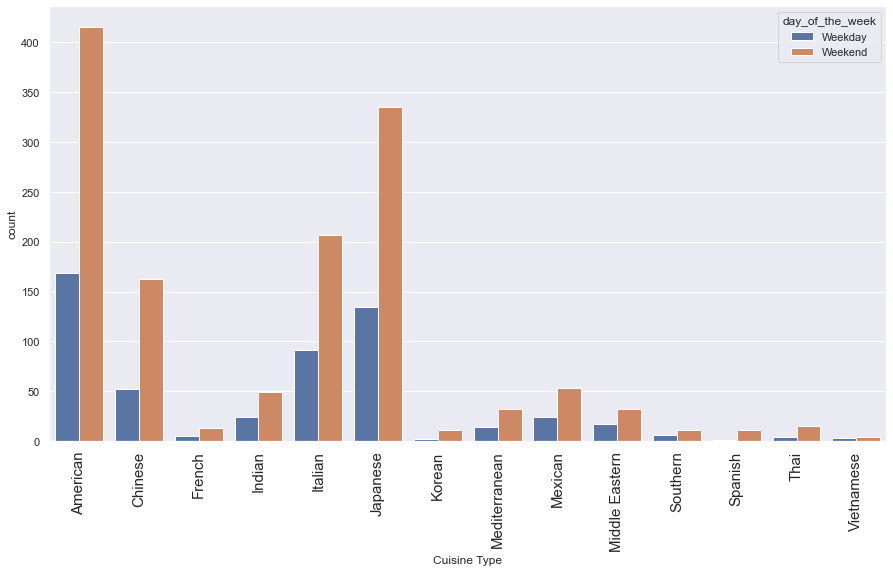

In [26]:
# Relationship between cuisine type and day of the week
plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df, x="cuisine_type", hue="day_of_the_week")
plt.xlabel("Cuisine Type");

### Observations:

- Most people order food online on the weekends.
- Both on week days and weekends, American is the most ordered cuisine type

### Day of the week vs delivery time

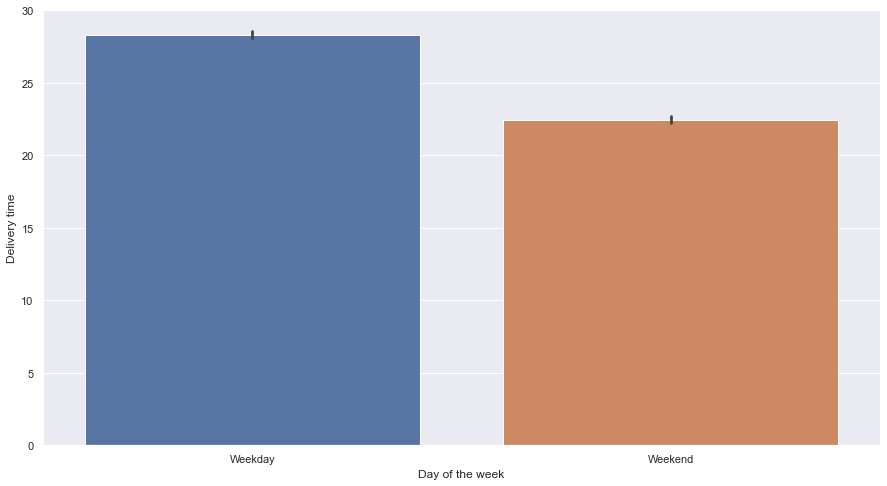

In [27]:
# Relationship between day of the week and delivery time
sns.barplot(data=df, y="delivery_time", x="day_of_the_week")
plt.xlabel("Day of the week");
plt.ylabel("Delivery time");

### Observations:
- The delivery time on weekdays is higher than that on weekends. This probably due to the higher traffic on the roads during weekdays as compared to weekends 

### Cuisine type vs rating

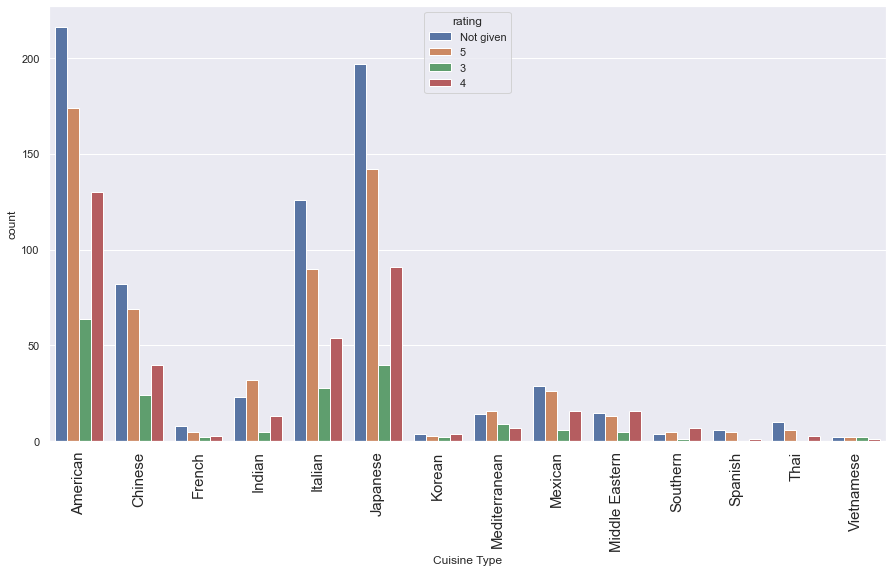

In [28]:
plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df, x="cuisine_type", hue="rating")
plt.xlabel("Cuisine Type");

### observations:
- Most orders are not rated
- American cuisine type have the highest number of ratings of **5**

### Cuisine type vs food preparation time vs day of the week

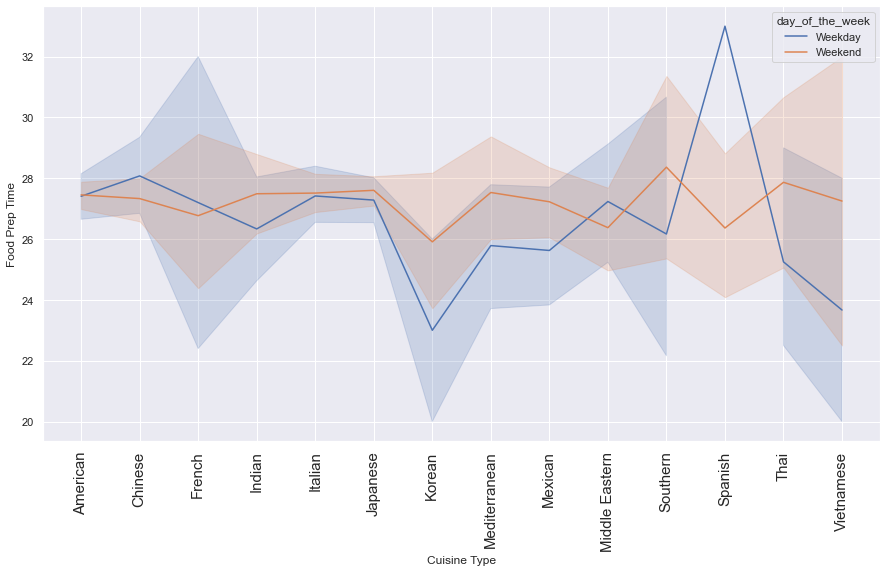

In [29]:
# Relationship between food preparation time, cuisine type and day of the week
plt.xticks(rotation=90, fontsize=15)
sns.lineplot(data=df, x="cuisine_type", y="food_preparation_time", hue="day_of_the_week")
plt.ylabel("Food Prep Time")
plt.xlabel("Cuisine Type");

### Observations ;

- There is a steep fall in food preparation time for the Korean cuisine type and a steep rise for Spanish cuisine type on weekdays.

### Rating vs cost of order

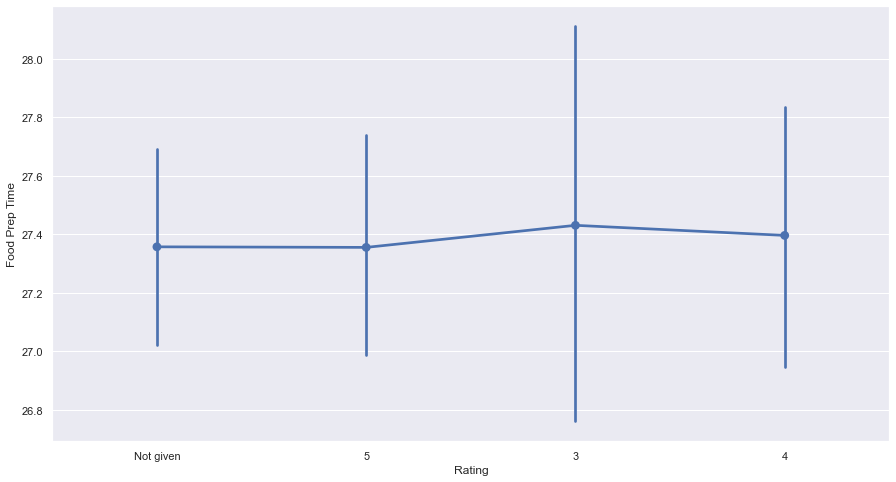

In [30]:
# Relationship between food preparation time and rating
sns.pointplot(data=df, y="food_preparation_time", x ="rating")
plt.ylabel("Food Prep Time")
plt.xlabel("Rating");

### Observations:
- Meals that received a rating of 5 were prepared in s shorter time compared to others

### Cost of order vs rating

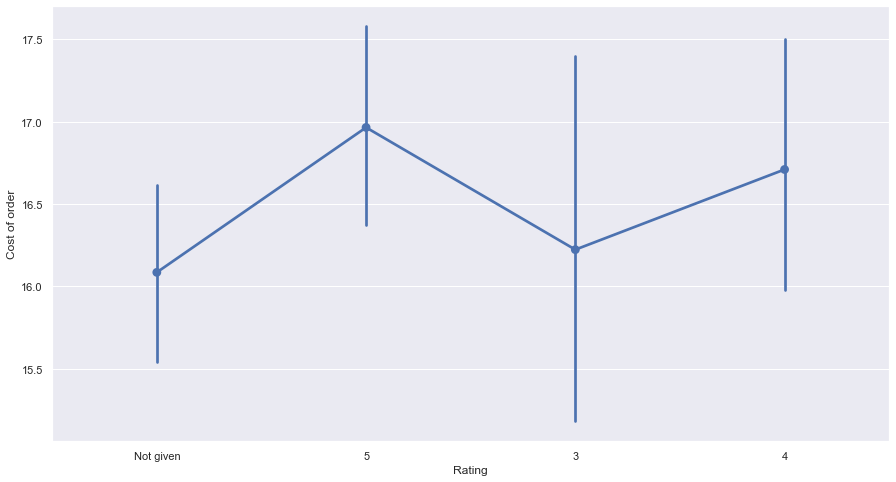

In [31]:
# Relationship between cost of the order and rating
sns.pointplot(data=df, y="cost_of_the_order", x ="rating")
plt.ylabel("Cost of order")
plt.xlabel("Rating");

### Observations:

- Orders that received a high rating of 5 costed more compared to others.

### Delivery Time vs Rating

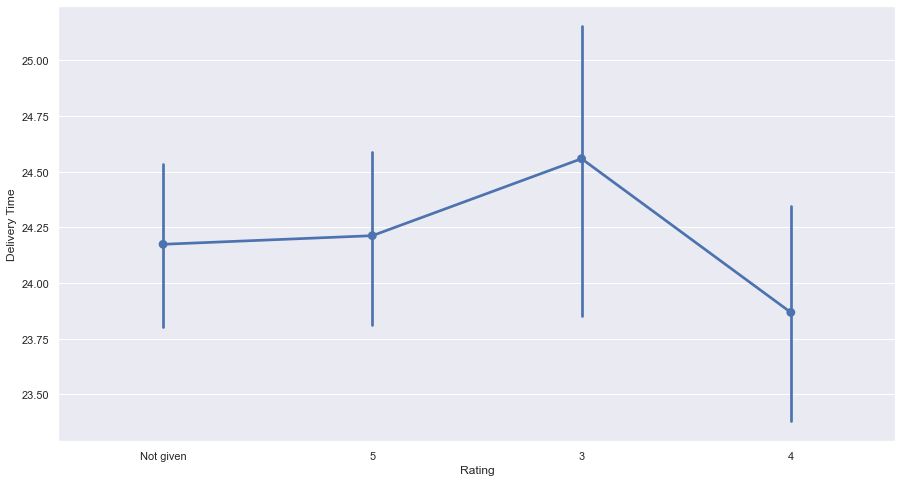

In [32]:
# Relationship between Delivery Time and rating
sns.pointplot(data=df, y="delivery_time", x ="rating")
plt.ylabel("Delivery Time")
plt.xlabel("Rating");

### Observations :
- Orders that take long to be delivered have the lowest rating of 3. Hence, customers do not appreciate waiting so long for their orders to be delivered to them.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:
# returns a data frame with only orders that were rated
df4 = df[df["rating"]!="Not given"]
df4["restaurant_name"].value_counts()

Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Market Table                   0
Paul & Jimmy's                 0
Room Service                   0
Rohm Thai                      0
Lamarca Pasta                  0
Name: restaurant_name, Length: 178, dtype: int64

In [34]:
# select restaurants with a rating count of more than 50
options = ['Shake Shack', 'The Meatball Shop', "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken"]
# selecting rows based on condition
df5 = df4[df4['restaurant_name'].isin(options)]
df5.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.3,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.2,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.2,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.1,Weekday,5,21,30


In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 3 to 1888
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               354 non-null    int64   
 1   customer_id            354 non-null    int64   
 2   restaurant_name        354 non-null    category
 3   cuisine_type           354 non-null    category
 4   cost_of_the_order      354 non-null    float64 
 5   day_of_the_week        354 non-null    category
 6   rating                 354 non-null    object  
 7   food_preparation_time  354 non-null    int64   
 8   delivery_time          354 non-null    int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 27.0+ KB


In [36]:
# Convert rating from object type to integer type
df5["rating"] = df5['rating'].astype(str).astype(int)

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 3 to 1888
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               354 non-null    int64   
 1   customer_id            354 non-null    int64   
 2   restaurant_name        354 non-null    category
 3   cuisine_type           354 non-null    category
 4   cost_of_the_order      354 non-null    float64 
 5   day_of_the_week        354 non-null    category
 6   rating                 354 non-null    int64   
 7   food_preparation_time  354 non-null    int64   
 8   delivery_time          354 non-null    int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 27.0 KB


In [38]:
# check the average rating of restaurants with rating count of greater than 50
df6 = df5.groupby(["restaurant_name"])["rating"].mean()
df6.sort_values(ascending=False).head()

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
'wichcraft                        NaN
Name: rating, dtype: float64

#### Observations:

- The The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi have a rating count of more than 50 and average rating greater than 4. Hence they fulfill the criteria to get the company's promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
# returns a dataframe with orders that cost more than 20 dollars
df7 = df[df["cost_of_the_order"]>20]
df7.shape

(555, 9)

In [40]:
# calculates the total revenue earned from orders that cost more than 20 dollars
df7["revenue"] = df7["cost_of_the_order"]*0.25
df7["revenue"].sum()

3688.7275

In [41]:
#  return dataframe with only orders having a cost greater than 5 dollars
df8 = df[df["cost_of_the_order"].between(5,20, inclusive="right")]
df8["revenue"] = df8["cost_of_the_order"]*0.15
df8.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,2.3505
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,0.8730
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24,2.9175


In [42]:
df8["revenue"].sum() # getting the sum of revenue earned from orders that cost more than 5 dollars

2477.5755

In [43]:
net_revenue = df7["revenue"].sum() + df8["revenue"].sum()
print(net_revenue)

6166.303


#### Observations:
- The net revenue generated by the company across all orders is **6166.303** dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
# creating a new column with total time
df["total_time"] = df["food_preparation_time"] + df["delivery_time"] 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [45]:
# returns a dataframe with orders that have a total time > 60 mins
df9 = df[df["total_time"]>60]
df9.shape

(200, 10)

In [46]:
df.shape

(1898, 10)

In [47]:
percentage_of_orders = 200/1898*100
print(percentage_of_orders)

10.537407797681771


#### Observations:
- **10.54%** of the orders take more than 60 minutes to be delivered from the time the order is place


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
# returns a dataframe with only weekday orders
df10 = df[df["day_of_the_week"]=="Weekday"]
# calculates mean of weekday orders' delivery time
df10["delivery_time"].mean()

28.340036563071298

In [49]:
# returns a dataframe with only weekend orders
df11 = df[df["day_of_the_week"]=="Weekend"]
# calculates the mean delivery time on weekend orders
df11["delivery_time"].mean()

22.4700222057735

#### Observations:
- The mean delivery time on weekdays is approximately **28.34** minutes where as on weekends it is **22.47** minutes
- This implies it takes less time to deliver food on weekends. This is probably due to the less traffic on weekends as most people are usually off work.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

- First and fore most, I would recommend the food aggregator company to encourage their customers to rate their orders once completed if they are not doing so as yet. From the analysis of the data, **38.78%** of the orders were not rated. This limits company from gathering enough information on how the customers appreciate their services plus which restaurants offer the best services. Encouraging customers to rate their orders could be done in the following ways.
    - Sending reminders to the customers to rate their orders
    - Making the rating process as short as possible. In this way the customer does not find the process boring.

- Secondly, since most people order online food mostly on the weekends, the company should make sure that there are enough available delivery people to get assigned to the different orders. This can be done through encouraging their delivery people to be available on weekends.

- Thirdly, According to the analysis, the top three cuisine types ordered by customers are; American, Japanese and Italian. Therefore, the company should provide access to more restaurants that prepare those cuisines to increase the customer base and orders coming in hence increasing the company's revenue.

- And lastly, 10.54% of the orders take more than 60 minutes to be prepared and delivered to the customer. Customers would not want to wait that long to receive their orders. I would like to recommend that the company looks into the reasons as to why orders would exceed an hour to reach the customer. If it is preparation time, then the company should encourage their registered restaurants to try an prepare customer meals as fast as possible unless if the circumstances are unavoidable.